In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score

        ID  weight  height  age  gender  smoking  drinking  Code Postal  \
0        1      90     193   69       1        1         1         6000   
1        2      49     160   69       1        1         1         6670   
2        3      87     198   69       0        1         1         6300   
3        4      89     194   72       0        0         0         6540   
4        5      67     183   67       1        0         0        59100   
...    ...     ...     ...  ...     ...      ...       ...          ...   
1090   994      80     179   37       0        0         1         6730   
1091   995      58     183   34       0        0         1         6200   
1092   997      92     200   40       1        1         0         6200   
1093   999      57     166   10       0        1         1         6100   
1094  1000      32     161   11       0        0         0         6230   

      STATION  BMI  type  
0           5   24     1  
1           5   19     1  
2           5   22

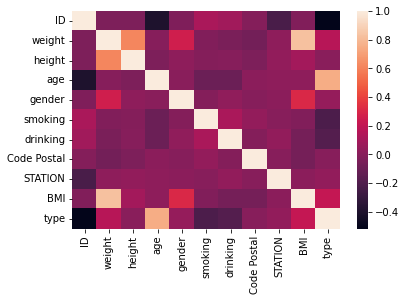

In [ ]:
class Deep :
    def deepLeaning(self):
        risk = pd.read_table("riskData.csv",sep=";",header=0)
        noRisk  = pd.read_table("noRiskData.csv",sep=";",header=0)
        # Add `type` column to `riskPeople` with value 1
        risk['type'] = 1

        # Add `type` column to `noRisk` with value 0
        noRisk['type'] = 0

        # Append `noRisk` to `Risk`
        peoples = risk.append(noRisk, ignore_index=True)
        print(peoples)
        corr = peoples.corr()
        sns.heatmap(corr,
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values)
        # Specify the data
        X=peoples.iloc[:,0:10]

        # Specify the target labels and flatten the array
        y= np.ravel(peoples.type)

        # Split the data up in train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        # Import `StandardScaler` from `sklearn.preprocessing`

        # Define the scaler
        scaler = StandardScaler().fit(X_train)

        # Scale the train set
        X_train = scaler.transform(X_train)

        # Scale the test set
        X_test = scaler.transform(X_test)
        # Initialize the constructor
        model = Sequential()

        # Add an input layer
        model.add(Dense(12, activation='relu', input_shape=(10,)))
        #test with tanh

        # Add one hidden layer
        model.add(Dense(8, activation='relu'))

        # Add an output layer
        model.add(Dense(1, activation='sigmoid'))

        # Model output shape
        print("model output shape")
        model.output_shape
        #print(model.output_shape)

        # Model summary
        print("model summary")
        model.summary()
        #print(model.summary())

        # Model config
        print("model config")
        model.get_config()
        #print(model.get_config())


        # List all weight tensors
        print("list all weight tensors")
        model.get_weights()
        #print(model.get_weights())

        model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

        model.fit(X_train, y_train,epochs=50, batch_size=1, verbose=1)

        y_pred = model.predict(X_test)
        print("y_pred")
        print(y_pred[:10])
        print("y_test")
        print(y_test[:10])

        score = model.evaluate(X_test, y_test,verbose=1)
        print("score:")
        print(score)

if __name__ == '__main__':
    deep = Deep()
    deep.deepLeaning()